In [2]:
from pathlib import Path

from IPython.display import Audio
import librosa
from librosa.display import waveshow, specshow
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
def vizu(data):
    fig, ax = plt.subplots(1, 1, figsize=(12, 6))
    ax.imshow(data, aspect="auto")
    #ax.set(title=f'MFCCs – {path.name}', ylabel='MFCC')
    #plt.tight_layout()

# Visualize the spectrogram images

In [3]:
folder = Path("data/genres_wav")

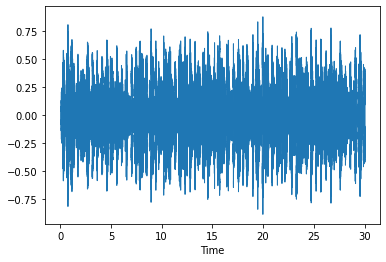

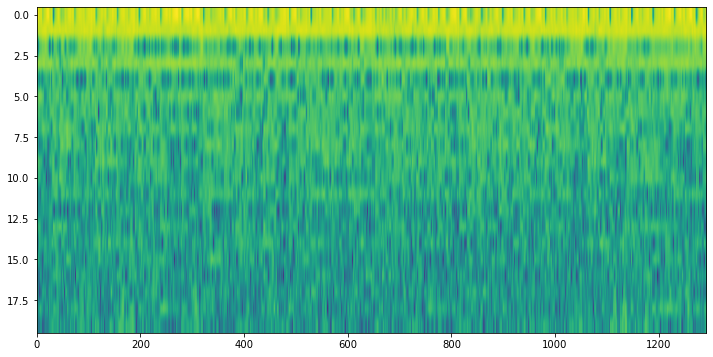

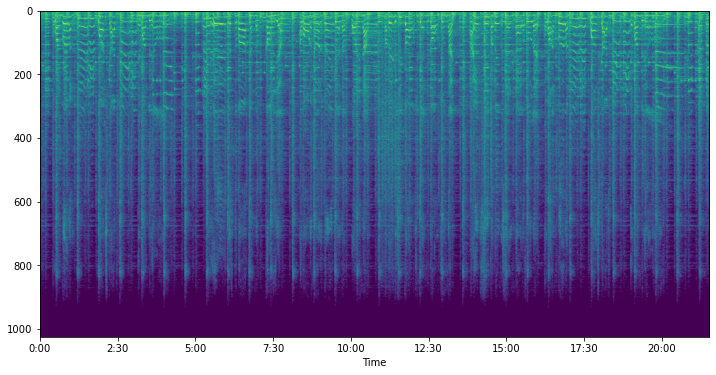

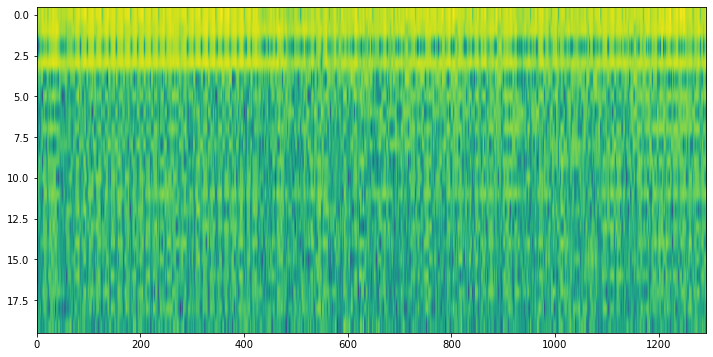

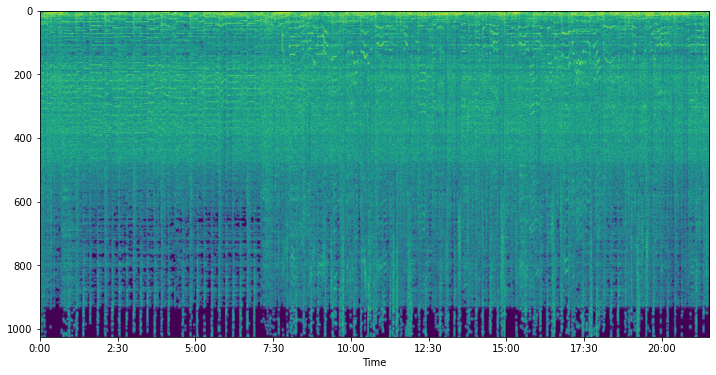

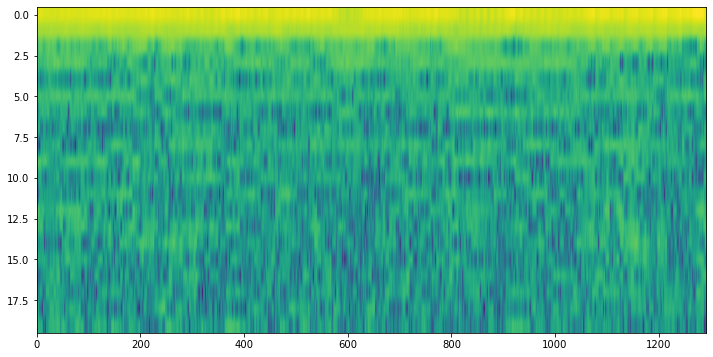

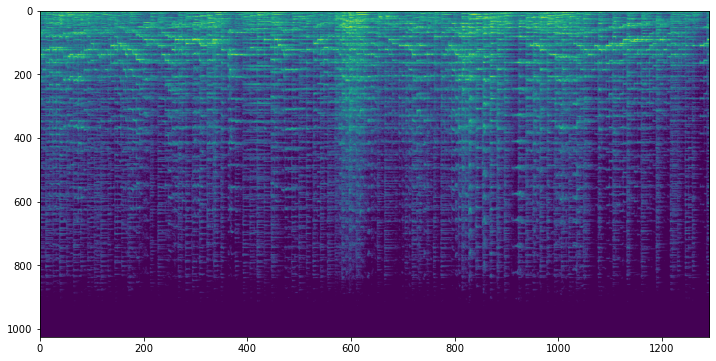

In [5]:
for path in [Path(folder, "blues_00000.wav"), Path(folder, "metal_00000.wav"), Path(folder, "classical_00000.wav")]:
    y, sr = librosa.load(path, mono=True, duration=30)
    waveshow(y, sr=sr)
    
    mfcc = librosa.amplitude_to_db(np.abs(librosa.feature.mfcc(y=y, sr=sr)))
    #specshow(mfcc)
    vizu(mfcc)
    
    spec = librosa.amplitude_to_db(np.abs(librosa.stft(y)))
    #specshow(np.abs(spec))
    vizu(spec)

    #ax.set(title=f'MFCCs – {path.name}', ylabel='MFCC')
    #plt.tight_layout()

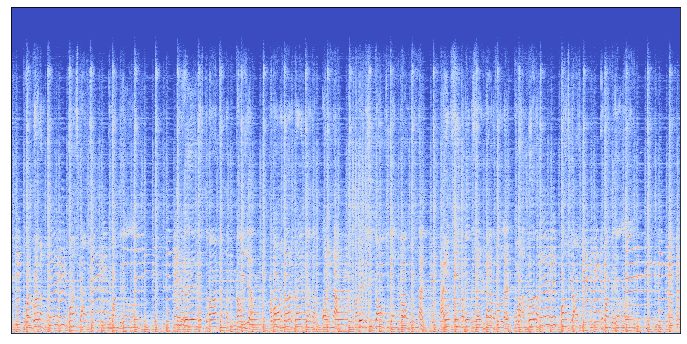

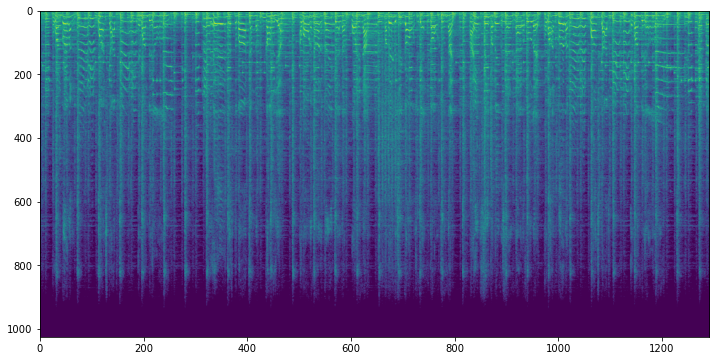

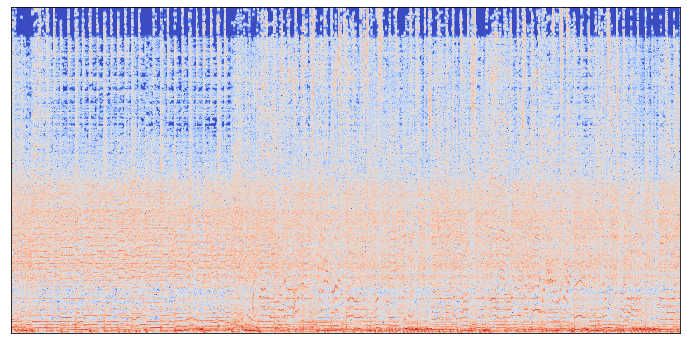

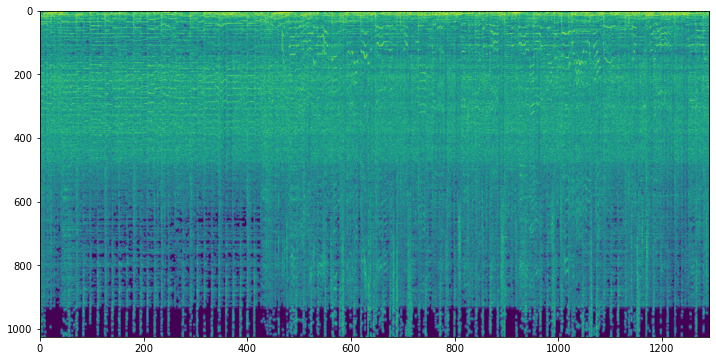

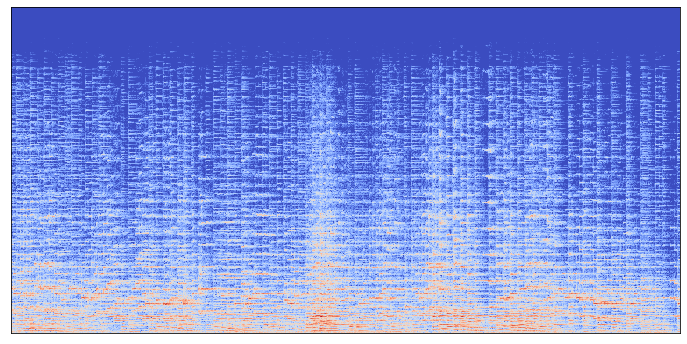

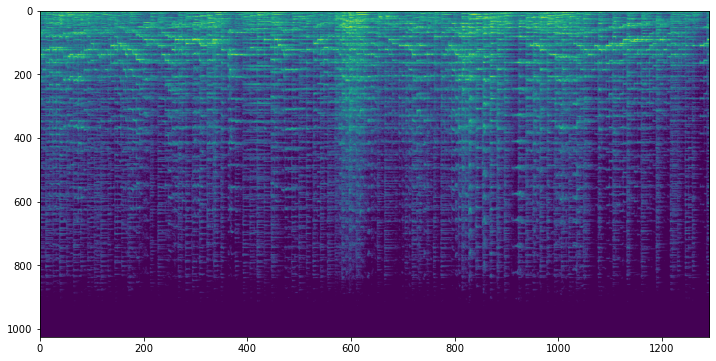

In [33]:
for path in [Path(folder, "blues_00000.wav"), Path(folder, "metal_00000.wav"), Path(folder, "classical_00000.wav")]:
    y, sr = librosa.load(path, mono=True, duration=30)

    spec = librosa.amplitude_to_db(np.abs(librosa.stft(y)))
    _, ax = plt.subplots(1, 1, figsize=(12, 6))
    specshow(spec, ax=ax)
    vizu(spec)

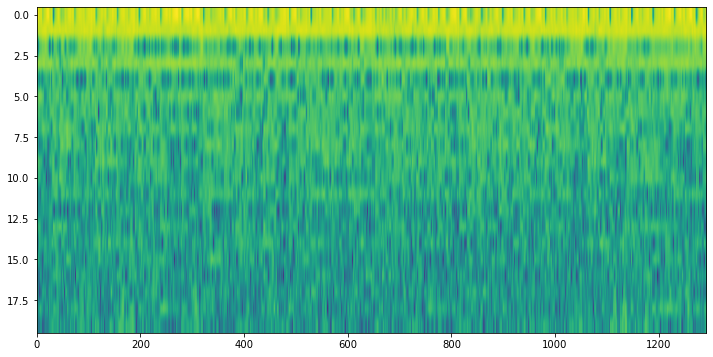

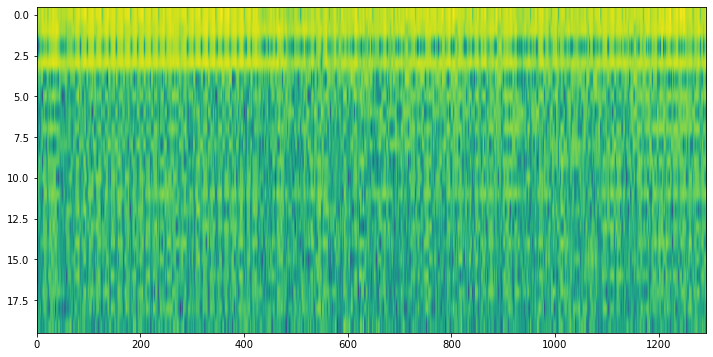

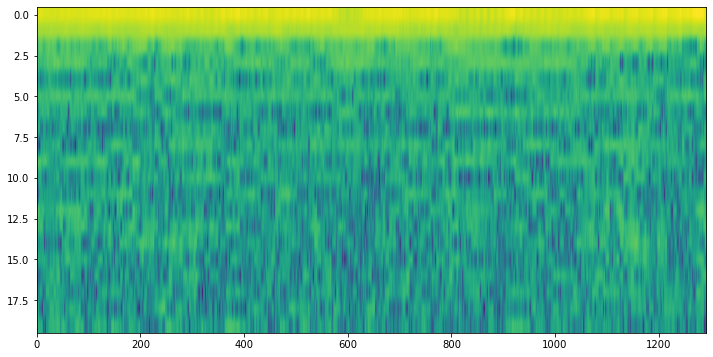

In [13]:
for path in [Path(folder, "blues_00000.wav"), Path(folder, "metal_00000.wav"), Path(folder, "classical_00000.wav")]:
    y, sr = librosa.load(path, mono=True, duration=30)

    mfcc = librosa.amplitude_to_db(np.abs(librosa.feature.mfcc(y=y, sr=sr)))
    # _, ax = plt.subplots(1, 1, figsize=(12, 6))
    # specshow(mfcc, ax=ax)
    vizu(mfcc)

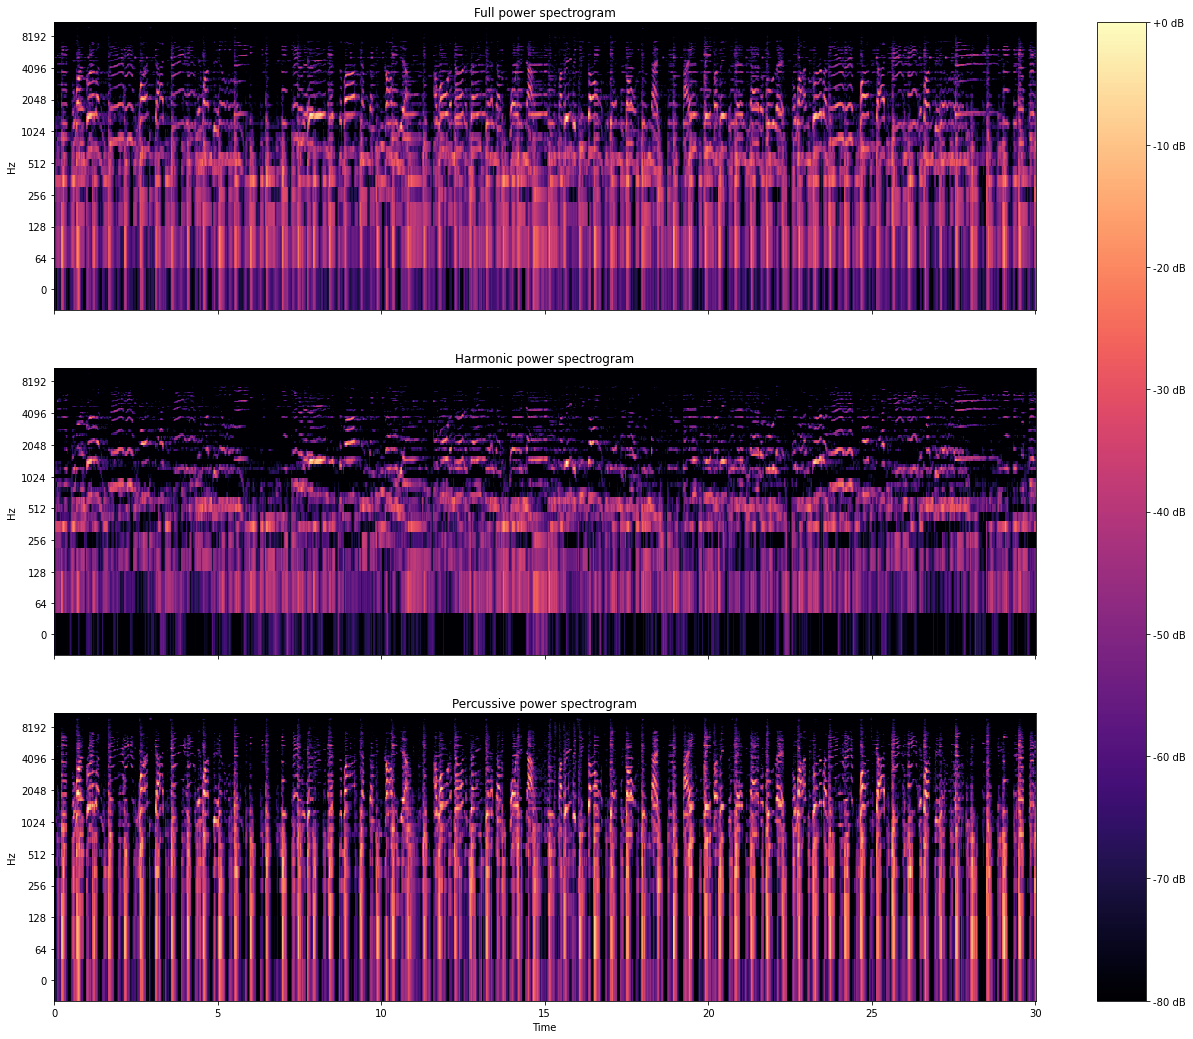

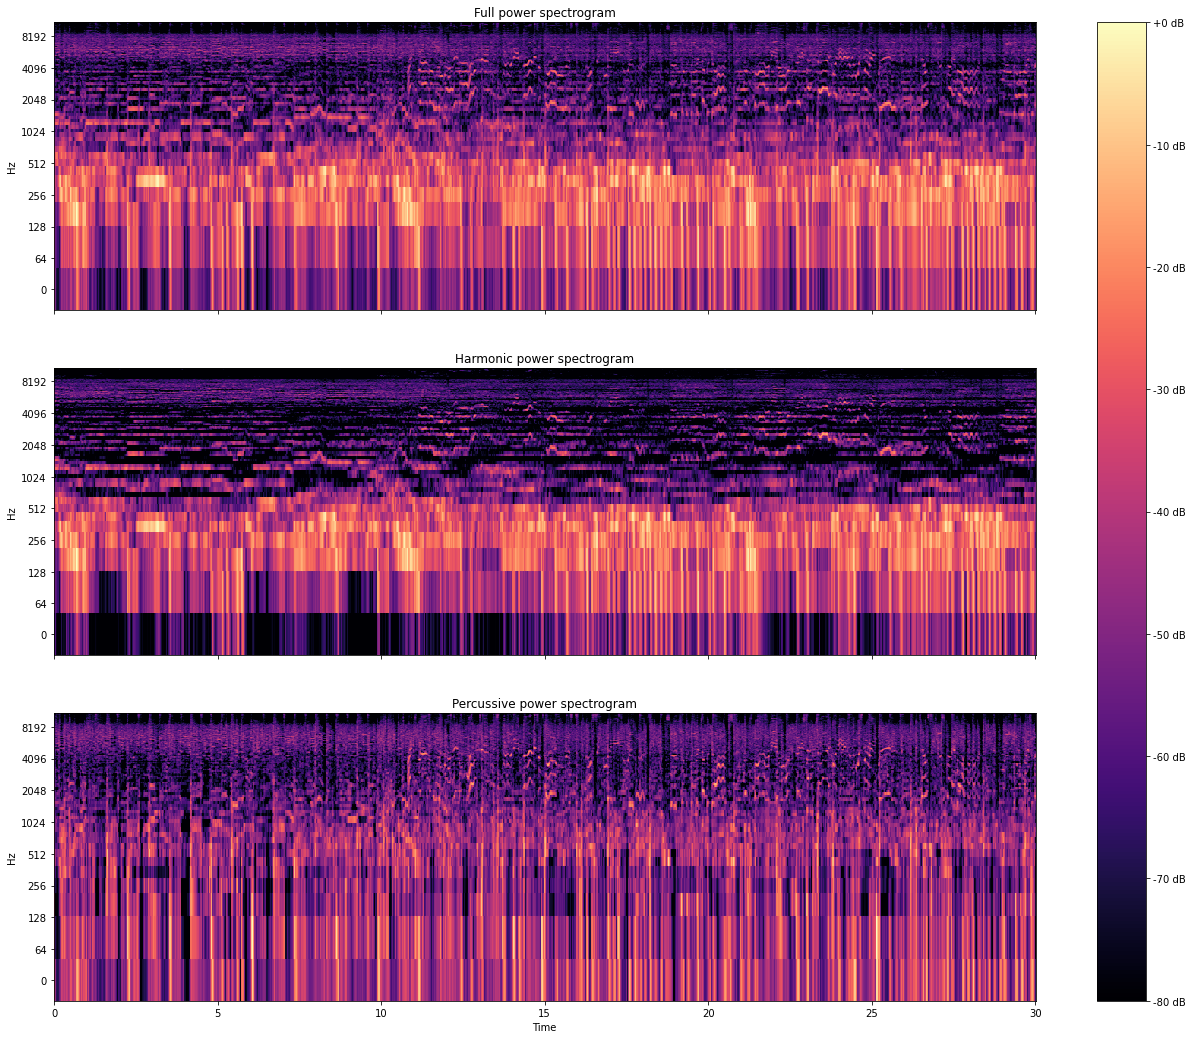

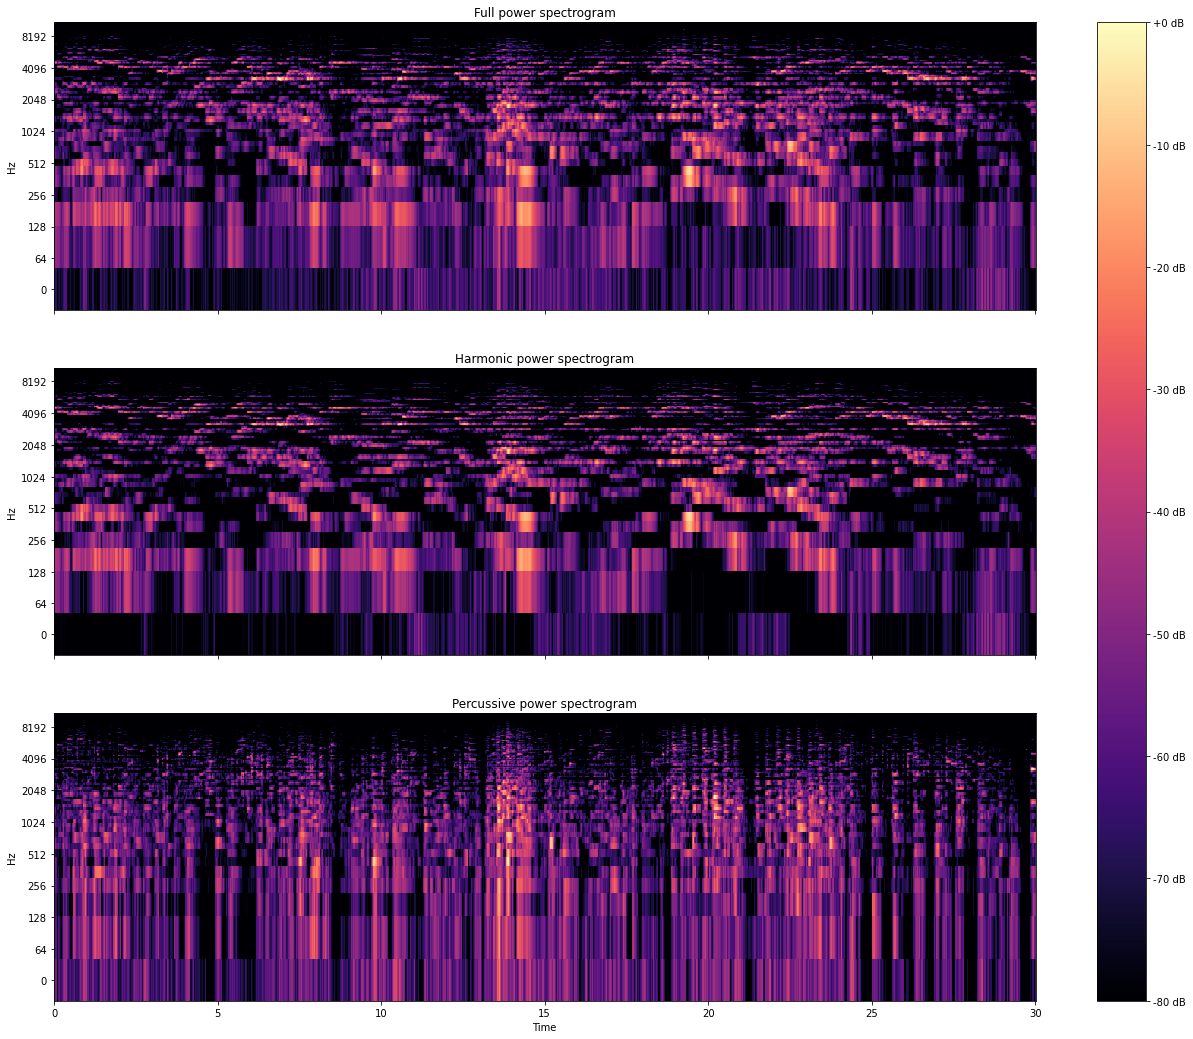

In [26]:
from pathlib import Path
import librosa
import matplotlib.pyplot as plt

folder = "data/genres_wav"
for path in [Path(folder, "blues_00000.wav"), Path(folder, "metal_00000.wav"), Path(folder, "classical_00000.wav")]:
    y, sr = librosa.load(path)
    D = librosa.feature.melspectrogram(y=y)
    H, P = librosa.decompose.hpss(D)

    fig, ax = plt.subplots(nrows=3, sharex=True, sharey=True, figsize=(22, 18))
    img = librosa.display.specshow(librosa.amplitude_to_db(np.abs(D), ref=np.max), y_axis='log', x_axis='time', ax=ax[0])
    ax[0].set(title='Full power spectrogram')
    ax[0].label_outer()

    librosa.display.specshow(librosa.amplitude_to_db(np.abs(H), ref=np.max(np.abs(D))), y_axis='log', x_axis='time', ax=ax[1])
    ax[1].set(title='Harmonic power spectrogram')
    ax[1].label_outer()

    librosa.display.specshow(librosa.amplitude_to_db(np.abs(P), ref=np.max(np.abs(D))), y_axis='log', x_axis='time', ax=ax[2])
    ax[2].set(title='Percussive power spectrogram')
    fig.colorbar(img, ax=ax, format='%+2.0f dB')

    

True
(40, 1293) (40, 1293)


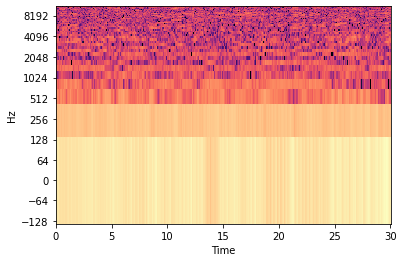

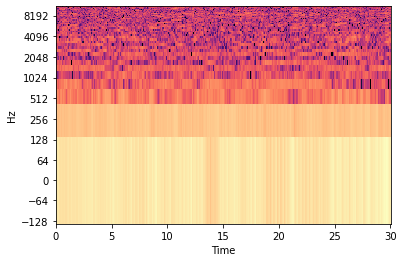

In [35]:
y, sr = librosa.load(path)
mfcc = librosa.feature.mfcc(y=y, sr=22050, n_mfcc=40, n_fft=2048, hop_length=512)

S = librosa.feature.melspectrogram(y=y)
mfcc2 = librosa.feature.mfcc(S=librosa.power_to_db(S=S), sr=22050, n_mfcc=40, n_fft=2048, hop_length=512)

print(np.equal(mfcc, mfcc2).all())

print(mfcc.shape, mfcc2.shape)

plt.figure()
librosa.display.specshow(librosa.amplitude_to_db(np.abs(mfcc), ref=np.max), y_axis='log', x_axis='time')
plt.figure()
librosa.display.specshow(librosa.amplitude_to_db(np.abs(mfcc2), ref=np.max), y_axis='log', x_axis='time')
